# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 3

Do wykonania laboratorium należy skorzystać z bibliotek:
- [numpy](https://numpy.org/)
- [matplotlib](https://matplotlib.org/)

### Zadanie 1 - zakupy

W sklepie dostępne są następujące produkty:

| Produkt | Cena (netto) | Podatek |
| --- | --- | --- |
| Chleb | 3 | 5% |
| Butelka wody (1l) | 2 | 8% |
| Pomidor 1szt. | 2 | 5% |
| Olej (1l) | 6 | 5% |
| Szafran | 1.5 | 8% |
| Krewetki (opakowanie) | 20 | 23% |
| Lód (opakowanie) | 5 | 23% |


#### Zadanie 1 A

- Zapisz nazwy produktów w tablicy `N`.
- Zapisz ceny produktów w tablicy `C`.
- Zapisz podatek w tablicy `P`.

*(tablicy jedno wymiarowej czyli wektorze)*



In [1]:
import numpy as np

In [2]:
N = np.array(['Chleb','Butelka wody 1l','Pomidor 1szt.','Olej (1l)','Szafran','Krewtki(opakowanie)','Lód(opakowanie)'])
C = np.array([3.,2.,2.,6.,1.5,20.,5.])
P = np.array([5,8,5,5,8,23,23])

#### Zadanie 1 B

Klient kupił:

- 2 szt. chleba, 
- 6 butelek wody,
- 1 opakowanie krewetek.

Zapisz zakupy klienta w wektorze `Z` (zachowaj wymiarowość).

In [3]:
Z = np.array([2,6,0,0,0,1,0])


#### Zadanie 1C

Oblicz sumę **netto** jaką klient musi zapłacić bez używania:
- operatora `+`, 
- funkcji/metody `sum`
- operatego mnożenia skalarnego (`*`, `__mul__`).

_Podpowiedź: jeden z wektorów trzeba transponować_

In [4]:
Z @ C.T

38.0

#### Zadanie 1D

Oblicz wartość **brutto** jaką klient musi zapłacić w sklepie. W tym zadaniu możesz użyć operatora `*`.

Dodatkowo, wyświetl rachunek w postaci tabeli zawierającą kolumny: 
- nazwa produktu,
- cena netto, 
- liczba sztuk, 
- cena netto danej pozycji (cena netto x liczba sztuk), 
- podatek (procentowo np. `5%`),
- cena brutto danej pozycji. 

Na końcu tabeli ma się wyświetlić suma brutto do zapłaty.

In [5]:
B = C*(1+(P/100))

In [6]:
brutto = Z @ B.T

In [7]:
paragon = np.vstack((N,C,Z,C*Z,P,B*Z))
paragon = paragon.T

In [8]:
B = C*(1+(P/100))

In [9]:
paragon1 = np.array([row for row in paragon if row[2]!=str(0)] )

In [10]:
A = ('Nazwa','Cena netto','Liczba sztuk','Cena netto poz','Podatek','Cena brutto poz')
print(f'{A[0]:20}|{A[1]:15}|{A[2]:15}|{A[3]:15}|{A[4]:15}|{A[5]:15}')
for row in paragon1:
    print(f'{row[0]:20}|{row[1]:15}|{row[2]:15}|{row[3]:15}|{row[4]:15}|{row[5]:15.4}')
print(f'Suma:{brutto:85}')

Nazwa               |Cena netto     |Liczba sztuk   |Cena netto poz |Podatek        |Cena brutto poz
Chleb               |3.0            |2              |6.0            |5              |6.30           
Butelka wody 1l     |2.0            |6              |12.0           |8              |12.9           
Krewtki(opakowanie) |20.0           |1              |20.0           |23             |24.6           
Suma:                                                                                43.86


### Zadanie 2

Zmodyfikuj kod z zadania pierwszego w ten sposób, że dane o produktach będą wczytywane z pliku `produkty.csv` a dane do rachunku (liczba zakupionych produktów) z pliku `rachunek.csv`.

Utwórz przykładowe dane (inne niż w zadaniu 1).

In [11]:
produkty = np.genfromtxt('produkty.csv', delimiter=';', dtype=str)


In [12]:
rachunek = np.genfromtxt('rachunek.csv', delimiter=';')


In [13]:
N = np.array(produkty[:,0])
C = np.array(produkty[:,1])
P = np.array(produkty[:,2])
Z = np.array(rachunek)

C = C.astype('int32')
P = P.astype('int32')
Z = Z.astype('int32')

B = C*(1+(P/100))
brutto = Z @ B.T

paragon = np.vstack((N,C,Z,C*Z,P,B*Z))
paragon = paragon.T

B = C*(1+(P/100))
paragon1 = np.array([row for row in paragon if row[2]!=str(0)] )

In [14]:
A = ('Nazwa','Cena netto','Liczba sztuk','Cena netto poz','Podatek','Cena brutto poz')
print(f'{A[0]:20}|{A[1]:15}|{A[2]:15}|{A[3]:15}|{A[4]:15}|{A[5]:15}')
for row in paragon1:
    print(f'{row[0]:20}|{row[1]:15}|{row[2]:15}|{row[3]:15}|{row[4]:15}|{row[5]:15.5}')
print(f'Suma:{brutto:84}')

Nazwa               |Cena netto     |Liczba sztuk   |Cena netto poz |Podatek        |Cena brutto poz
bułka 1szt          |1              |2              |2              |5              |2.1            
Sprite (2,5)        |6              |3              |18             |23             |22.14          
Kurczak 1kg         |12             |1              |12             |23             |14.76          
Pieprz              |2              |4              |8              |5              |8.4            
Suma:                                                                                47.4


### Zadanie 3

#### Zadanie 3 A

Utwórz dwa wektory dwuelementowe `A` i `B` (dowolne wartości dodatnie różne od zera).

Następnie wykonaj sumowanie elementów obu wektorów i zapisz w zmiennej `C`.


In [15]:
A = [1,2]
B = [5,1]
C = [A[0]+B[0],A[1]+B[1]]
C

[6, 3]

#### Zadanie 3 B

Wyświetl na wykresie:
- _wektor wodzący_ (strzałkę) z punktu `(0, 0)` do punktów `A` oraz `B` (w kolorze <font color='green'>zielonym</font>),
- _wektor wodzący_ (strzałkę) z punktu `(0, 0)` do punktu `C` (w kolorze <font color='red'>czerwonym</font>)
- wektor wodzący z punktu `A` do punktu `C` (w kolorze <font color='blue'>niebieskim</font>),
- wektor wodzący z punktu `B` do punktu `C` (w kolorze <font color='blue'>niebieskim</font>).

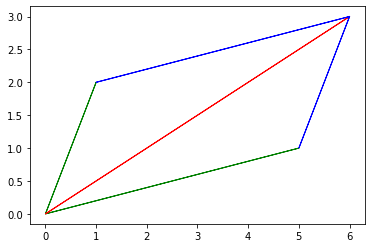

In [16]:
import matplotlib.pyplot as plt

plt.arrow(0,0,A[0],A[1], color='g')
plt.arrow(0,0,B[0],B[1], color='g')

plt.arrow(0,0,C[0],C[1], color='r')

plt.arrow(A[0],A[1],B[0],B[1], color='b')
plt.arrow(B[0],B[1],A[0],A[1], color='b')

### Zadanie 4

Wygeneruj losową macierz 8×8 wg rozkładu Gaussa (średnia: 100, odch. std = 15),
wartości zaokrąglij do liczb całkowitych (int). Macierz ta reprezentuje pewien obraz (w skali szarości).

Następnie zastosuj filtr uśredniający o masce 3×3 dla elementów wewnętrznych (tj. poza brzegiem) tej macierzy i wypisz wynik. W filtrze uśredniającym zastosuj zaokrąglanie w dół do liczby całkowitej.

_Podpowiedź: generacja danych: np.random.normal, np.round._

In [17]:
arr = np.random.normal(100, 15, (8,8))
arr = arr.astype('int32')

In [18]:
arr

array([[122,  88,  73, 109,  95, 107,  94,  99],
       [104,  98,  91, 103, 107,  87,  93, 128],
       [123, 113,  53, 121,  96,  98,  83,  88],
       [107,  81,  97, 125, 120, 114,  90,  98],
       [ 76, 116,  81,  86, 120,  89, 121, 134],
       [ 97,  90, 107,  55, 128, 122, 109, 123],
       [ 83,  95, 102, 104, 105, 133, 137,  76],
       [ 94, 103, 106, 103,  97,  98,  92,  40]])

In [21]:
filtered = np.zeros((len(arr)-2,len(arr)-2))

for i in range(len(arr)-2):
    for j in range(len(arr)-2):
            filtered[i][j]=np.floor(np.sum(arr[i:i+3,j:j+3])/9)
            

In [22]:
filtered

array([[ 96.,  94.,  94., 102.,  95.,  97.],
       [ 96.,  98., 101., 107.,  98.,  97.],
       [ 94.,  97.,  99., 107., 103., 101.],
       [ 94.,  93., 102., 106., 112., 111.],
       [ 94.,  92.,  98., 104., 118., 116.],
       [ 97.,  96., 100., 105., 113., 103.]])